In [32]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Analyse exploratoire des données
## Import des données

In [2]:
df = pd.read_csv("../data/base_modelis_pass_det.csv", sep = ';')

In [3]:
xls = pd.ExcelFile('../data/Dictionnaire.xlsx')
dic_var = pd.read_excel(xls, 'variables')

In [4]:
df.head()

cd_op date_entree_defaut date_sortie_defaut    arrete  fl_pass_DET  \
0  I860708600           16/01/17                NaN  31/01/17            0   
1  I860708600           16/01/17                NaN  28/02/17            0   
2  I860708600           16/01/17                NaN  31/03/17            0   
3  I860708600           16/01/17                NaN  30/04/17            0   
4  I860708600           16/01/17                NaN  31/05/17            0   

   nb_prt              DT_MEP_OPE CD_NAT_EMP1 CD_NAT_EMP2  ANC_BANC_MAX_PFI  \
0       1  15SEP1986:00:00:00.000         NaN         NaN               NaN   
1       1  15SEP1986:00:00:00.000         NaN         NaN               NaN   
2       1  15SEP1986:00:00:00.000         NaN         NaN               NaN   
3       1  15SEP1986:00:00:00.000         NaN         NaN               NaN   
4       1  15SEP1986:00:00:00.000         NaN         NaN               NaN   

   ... EAD_1an_avant_def LTVnonactu_1an_avant_def  dls_ges_def  AMI  EXE  PTG  \
0  ...           1121.38                      NaN            0  NaN  NaN  NaN   
1  ...           1121.38                      NaN            1  NaN  NaN  NaN   
2  ...           1121.38                      NaN            2  NaN  NaN  NaN   
3  ...           1121.38                      NaN            3  NaN  NaN  NaN   
4  ...           1121.38                      NaN            4  NaN  NaN  NaN   

   AGE_EMP1  AGE_EMP2  TX_ENDET  MT_REST_VIVRE  
0        74      78.0       NaN            NaN  
1        75      78.0       NaN            NaN  
2        75      78.0       NaN            NaN  
3        75      78.0       NaN            NaN  
4        75      78.0       NaN            NaN  

[5 rows x 90 columns]

## Informations globales

In [5]:
print(f"Dimensions : {df.shape}")
print(f"{df.select_dtypes(include='object').shape[1]} variables catégorielles, "
      f"{df.select_dtypes(exclude='object').shape[1]} variables continues")

Dimensions : (329064, 90)
20 variables catégorielles, 70 variables continues


# Définition des variables

In [6]:
dic_var

Unnamed: 0  \
0                                                  NaN   
1                                              Données   
2                             Code opération en défaut   
3                                        Date d'arrêté   
4    Flag Recupérations du totalité des sommes déca...   
..                                                 ...   
107                            Flag Affaires spéciales   
108                                        Flag Fraude   
109                                       Flag PCL/BDF   
110                                    Flag exclusion    
111                               Flag créances cédées   

    DICTIONNAIRE DES VARIABLES  \
0                          NaN   
1                     Variable   
2                        cd_op   
3                       arrete   
4                 fl_recup_tot   
..                         ...   
107              fl_aff_specif   
108                  fl_fraude   
109                 fl_sur_pcl   
110               fl_exclusion   
111         fl_creances_cedees   

                                            Unnamed: 2  
0                                                  NaN  
1                                         Commentaires  
2    Identifiant unique des opérations suivies ensu...  
3    Date d'arreté mensuelle à partir de l'entrée d...  
4    VARIABLE A MODELISER =1 si le total des récupé...  
..                                                 ...  
107                Portefeuille des Affaires Spéciales  
108                                Portefeuille Fraude  
109  Flag Surendettement/ Procédure collective : dt...  
110  =1 si sum(fl_aff_specif,fl_fraude,fl_sur_pcl_a...  
111                      =1 si la créances a été cédée  

[112 rows x 3 columns]

In [7]:
var_list = list(dic_var["DICTIONNAIRE DES VARIABLES"].unique())
var_list = var_list[2:]

In [8]:
var_list_in_df = [x for x in var_list if x in df.columns]

In [9]:
dic_var['cat'] = dic_var['Unnamed: 0'] + ' (' + dic_var["Unnamed: 2"] + ')'

In [10]:
filtered_df = dic_var[dic_var['DICTIONNAIRE DES VARIABLES'].isin(var_list_in_df)]
variable_dict_full = dict(zip(filtered_df['DICTIONNAIRE DES VARIABLES'], filtered_df['cat']))
variable_dict = dict(zip(filtered_df['DICTIONNAIRE DES VARIABLES'], filtered_df['Unnamed: 0']))

In [11]:
with open('../data/dictionnaire.json', 'w') as json_file:
    json.dump(variable_dict_full, json_file)

# Analyse des Variables

### Conversion des variables date en datetime

In [12]:
df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'], format='%d/%m/%y')
df['date_sortie_defaut'] = pd.to_datetime(df['date_sortie_defaut'], format='%d/%m/%y', errors='coerce')
df['arrete'] = pd.to_datetime(df['arrete'], format='%d/%m/%y')
df['DT_MEP_OPE'] = pd.to_datetime(df['DT_MEP_OPE'], format='%d%b%Y:%H:%M:%S.%f')

df['dt_arr_last_enc_ope'] = pd.to_datetime(df['dt_arr_last_enc_ope'], errors='coerce')
df['dt_arr_1st_enc_ope'] = pd.to_datetime(df['dt_arr_1st_enc_ope'], errors='coerce')
df['dtHJD_prov'] = pd.to_datetime(df['dtHJD_prov'], errors='coerce')
df['dtHJD_def'] = pd.to_datetime(df['dtHJD_def'], errors='coerce')

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_7995/660565354.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dt_arr_last_enc_ope'] = pd.to_datetime(df['dt_arr_last_enc_ope'], errors='coerce')
/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_7995/660565354.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dt_arr_1st_enc_ope'] = pd.to_datetime(df['dt_arr_1st_enc_ope'], errors='coerce')
/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_7995/660565354.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dtHJD_prov'] = pd.to_datet

In [13]:
df['date_entree_defaut'] = df['date_entree_defaut'].dt.strftime('%d/%m/%Y')
df['date_sortie_defaut'] = df['date_sortie_defaut'].dt.strftime('%d/%m/%Y')
df['arrete'] = df['arrete'].dt.strftime('%d/%m/%Y')
df['DT_MEP_OPE'] = df['DT_MEP_OPE'].dt.strftime('%d/%m/%Y')

### Étude des variables continues

In [14]:
numericals = df.select_dtypes(exclude='object').columns.to_list()

In [16]:
numericals

['fl_pass_DET',
 'nb_prt',
 'ANC_BANC_MAX_PFI',
 'CD_POST_BIEN_PFI',
 'MT_PATRIM_MOB',
 'MT_CHA_HORS_OPE_PFI',
 'NB_CHARGE_HORS_OPE_PFI',
 'MT_PATRIM_NET',
 'MT_REV_PFI',
 'FL_REL_NON_ANNULE',
 'NB_DUR_PFI',
 'TX_APPOR',
 'MT_CHA_CSM_REV',
 'MT_CHA_IMP',
 'MT_CHA_PIP',
 'MT_CHA_PIV',
 'FL_ETR',
 'CD_ETAT_CIVIL',
 'NB_RP_HOP',
 'NB_RS_HOP',
 'NB_LO_HOP',
 'cum_dec',
 'cum_rec',
 'cum_frs_externes',
 'CD_DNE_CHR_LGD_SAIN',
 'MT_EAD_RESID',
 'MT_EAD_DNE_CHR_d',
 'fl_prise_de_gar',
 'fl_fam_vam',
 'fam_ETH',
 'fam_ENQ',
 'fam_exp',
 'fam_hyp',
 'fam_sim',
 'fam_AEP',
 'dat_dec_echec',
 'solution',
 'fam_PCD',
 'dtSRT1st',
 'dtHJD_def',
 'dtHJD_prov',
 'MR_arr',
 'CD_MTF_ENE_CTX',
 'niv_gravite_mtf_dne',
 'niv_gravite_mtf_dfs',
 'no_pass_def',
 'dt_arr_last_enc_ope',
 'dt_arr_1st_enc_ope',
 'dls_mep_entree_def',
 'nb_bienHOP',
 'ANC_PRO_MAX_PFI',
 'max_age_ctx',
 'nb_empr_ope',
 'fl_def_ss_pass_CTX',
 'fl_prt_Conso',
 'fl_fonc',
 'valeur_bien_afr',
 'mt_inscrip_devant_CL_afr',
 'dispo_HP_af

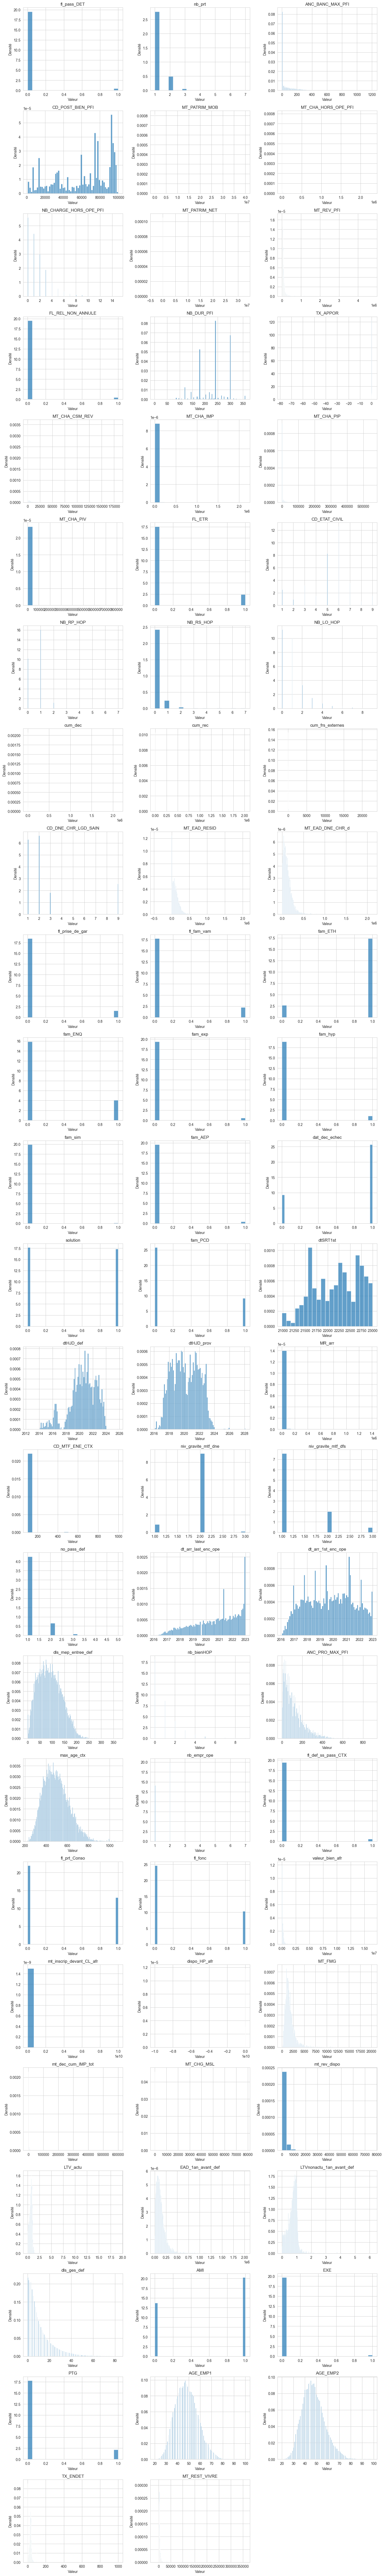

In [17]:
cols = 3
rows = np.ceil(len(numericals) / cols).astype(int)

# Créer une figure et des axes pour les sous-graphiques
fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))

# Parcourir chaque variable numérique pour créer son sous-graphique de densité
for i, var in enumerate(numericals):
    ax = axs[i // cols, i % cols]  # Trouver la position correcte dans la grille
    ax.hist(df[var], bins='auto', density=True, alpha=0.7)
    ax.set_title(var)
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Densité')

# Si le nombre de variables numériques n'est pas un multiple de cols, désactiver les axes inutilisés
if len(numericals) % cols != 0:
    for idx in range(i + 1, rows * cols):
        axs.flat[idx].set_visible(False)

plt.tight_layout()
plt.show()

Variable d'info sur l'emprunteur :
- NB_CHARGE_HORS_OPE_PFI : nbr de charges à l'octroi
- ANC_BANC_MAX_PFI : Ancienneté bancaire maximale, pourrait être dichotomiser en nouveau et ancien client. 
- NB_RP_HOP : nbr de biens résidences principales hors opération, possible catégorielle (demander maman)
- NB_RS_HOP : nbr de biens résidences secondaires hors opération
- NB_LO_HOP : nbr de biens locatifs HO
- nb_bienHOP : nbr de biens HO (somme de NB_LO_HOP, NB_RS_HOP, NB_RP_HOP ??)
- ANC_PRO_MAX_PFI : ancienneté professionnelle maximale (peut modéliser la stabilité de l'emprunteur)
- max_age_ctx : âge max de l'entrée en défaut
- EAD_1an_avant_def : EAD 1 an avant la date de défaut (voir def)
- AGE_EMP1 : âge emprunteur 1 (+ 80 ans ?)
- AGE_EMP2 : âge emprunteur 2
- TX_ENDET : taux d'endettement à l'octroi
- MT_REST_VIVRE : reste à vivre mensuel

Variable d'info sur l'opération : 
- nb_prt : nombre de prêt dans l'opération, 83% des opérations ont un seul prêt. à conserver en numérique.
- NB_DUR_PFI : durée l'opération, quelle unité temporelle ? 
- TX_APPOR : taux d'apport, valeur négative ? 
- dls_mep_entree_def : Délais écoulés entre les dates de mise en place et d'entrée en défaut
- nb_empr_ope : nbr emprunteurs sur l'opération
- dls_ges_def : délai de gestion depuis l'entrée au CTX

Variables de montant :
- MT_PATRIM_NET : montant du patrimoine immobilier net, pas mal d'outliers, des valeurs négatives
- MT_REV_PFI : revenu annuel des emprunteurs, quelques outliers
- MT_PATRIM_MOB : montant du patrimoine mobilier (épargne) : pas mal d'outliers
- MT_CHA_HORS_OPE_PFI : montant des charges à l'octroi, pourrait être importante, pas mal d'outliers
- MT_CHA_HORS_OPE_PFI : montant des charges à l'octroi, pourrait être importante, pas mal d'outliers
- MT_CHA_CSM_REV : montant des charges de prêts conso (important) 
- MT_CHA_IMP : Montant total des postes de charge impôts, quelques outliers
- MT_CHA_PIP : montant des charges de prêts immo autre que les prêts cautionnés par CL, pas mal de 0
- MT_CHA_PIV : montant des charges sur prêts mis en vente,  pas mal de 0
- MT_EAD_RESID : EAD résiduelle
- MT_EAD_DNE_CHR_d : EAD à l'entrée en 1re CHR observée sur l'arrêté dernier connu
- MR_arr : Montant recouvrable de l'opération à la date d'arrêté, bcp de 0
- valeur_bien_afr : Montant de gage au niveau de l'affaire à laquelle est affectée l'opération **Pas utile pour notre sujet**
- mt_inscrip_devant_CL_afr : **pas utile pour notre sujet**
- dispo_HP_afr : **pas utile pour notre sujet**
- mt_FMG : Participation au fond mutuel de garantie payé par l'emprunteur pour la mise en place de la garantie
- MT_CHG_MSL : total des charges lors du passage au contentieux
- MT_rev_dispo : total des revenus lors du passage au contentieux (Faire un ratio avec MT_CHG_MSL)
- LTV_actu : Loan to value actualisée à la date d'entrée de défaut
- LTVnonactu_1an_avant_def : Loan to value non actualisée 1 an avant la date d'entrée de défaut

Autre : 
- cum_dec : cumul des décaissements
- cum_rec : cumul des récupérations
- cum_frs_externes : cumul des décaissements frais externes
- dtSRT1st : ?
- mt_dec_cum_IMP_tot : cumul des montants décaissés au titre IMP

Variables à catégoriser : 
- fl_pass_det : variable cible, à passer en catégorielle
- CD_POST_BIEN_PFI : code postal du bien, à passer en catégorielle. 
- FL_REL_NON_ANNULE : variable binaire, à catégoriser
- FL_ETR : variable binaire, 1 si un des deux emprunteurs est étranger
- CD_ETAT_CIVIL : état civil, à vcatégoriser
- CD_DNE_CHR_LGD_SAIN : classe de risque LGD 
- fl_prise_de_gar : prise de garantie, à définir
- fl_fam_vam : vente amiable ou non
- fam_ETH : flag évènement ETH
- fam_ENQ : flag évènement procédure d'enquête
- fam_exp : flag évènement procédure d'expertise
- fam_hyp : flag évènement procédure d'hypothèque
- fam_sim : flag évènement saisie immobilière
- fam_AEP : flag absence de bien
- dat_dec_echec : échec de la phase découverte
- solution : flag solution négociée 
- fam_PCD : flag évènement PCD
- CD_MTF_ENE_CTX : Motif du défaut dernier connu au niveau de l'opération
- niv_gravite_mtf_dne : Regroupement des motifs d'entrée en défaut
- niv_gravite_mtf_dfs : Regroupement des motifs de défaillance
- no_pass_def : numéro de passage en défaut
- fl_def_ss_pass_CTX : Flag Defaut sans passage au CTX (entrée par contagion prudentielle)
- fl_prt_Conso : présence d'un prêt à la conso au moment de l'octroi
- fl_fonc : flag fonctionnaire 
- AMI : ? 
- EXE : ?
- PTG : ?

In [18]:
var_to_categorize = [
    "fl_pass_DET",
    "CD_POST_BIEN_PFI",
    "FL_REL_NON_ANNULE",
    "FL_ETR",
    "CD_ETAT_CIVIL",
    "CD_DNE_CHR_LGD_SAIN",
    "fl_prise_de_gar",
    "fl_fam_vam",
    "fam_ETH",
    "fam_ENQ",
    "fam_exp",
    "fam_hyp",
    "fam_sim",
    "fam_AEP",
    "dat_dec_echec",
    "solution",
    "fam_PCD",
    "CD_MTF_ENE_CTX",
    "niv_gravite_mtf_dne",
    "niv_gravite_mtf_dfs",
    "no_pass_def",
    "fl_def_ss_pass_CTX",
    "fl_prt_Conso",
    "fl_fonc",
    "AMI",
    "EXE",
    "PTG"
]


In [19]:
len(var_to_categorize)

27

In [20]:
for var in var_to_categorize : 
    df[var] = df[var].astype("object")

### Étude des variables catégorielles

In [45]:
categoricals = df.select_dtypes(include='object').columns.to_list()

In [46]:
categoricals = [x for x in categoricals if 'date' not in x ]

In [55]:
def plot_categoricals(col):
    plt.hist(df[col])

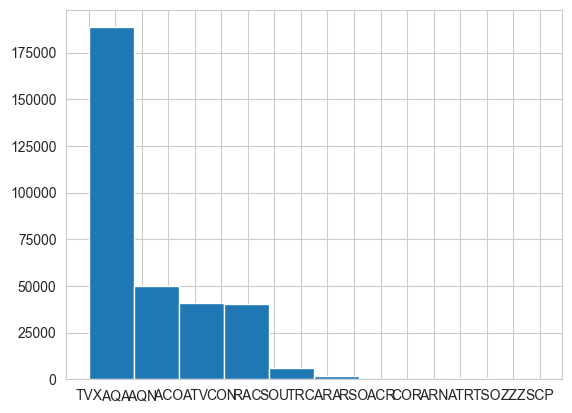

In [56]:
plot_categoricals("CD_NATUR_OP_PFI")

In [27]:
info_cat = pd.DataFrame(columns = ["Variable", "Définition", "Nbr Catégories",])
info_cat["Variable"] = categoricals
info_cat["Nbr Catégories"] = [df[cat].nunique() for cat in categoricals]
info_cat["Définition"] = [variable_dict[cat] if cat in variable_dict else 'N/A' for cat in categoricals]

In [28]:
info_cat

Variable                                         Définition  \
0                 cd_op                           Code opération en défaut   
1                arrete                                      Date d'arrêté   
2           fl_pass_DET                                Flag passage en DET   
3            DT_MEP_OPE               Date de mise en place de l'opération   
4           CD_NAT_EMP1                      Nationalité de l'emprunteur 1   
5           CD_NAT_EMP2                      Nationalité de l'emprunteur 2   
6           CD_DEST_PFI                                Destination du bien   
7       CD_NATUR_OP_PFI                              Nature de l'opération   
8      CD_POST_BIEN_PFI                                Code postal du bien   
9     FL_REL_NON_ANNULE            Flag présence de prêt relais non annulé   
10               FL_ETR                                                N/A   
11        CD_ETAT_CIVIL                                        Etat civil    
12          CD_CSP_EMP1               CSP de l'emprunteur 1 de l'opération   
13          CD_CSP_EMP2               CSP de l'emprunteur 2 de l'opération   
14       CD_SITFAM_EMP1              Situation familiale de l'emprunteur 1   
15       CD_SITFAM_EMP2              Situation familiale de l'emprunteur 2   
16  CD_DNE_CHR_LGD_SAIN                                      CHR LGD sains   
17      fl_prise_de_gar  Flag Evénement de la procédure Prise de titre/...   
18           fl_fam_vam                                 Flag Vente amiable   
19              fam_ETH                Flag Evénement de la procédure ETH    
20              fam_ENQ             Flag Evénement de la procédure Enquête   
21              fam_exp                         Flag Evénement d'expertise   
22              fam_hyp          Flag Evénement de la procédure Hypotheque   
23              fam_sim  Flag Evénement de la procédure de la saisie im...   
24              fam_AEP                               Flag Absence de bien   
25        dat_dec_echec                      Echec de la phase découverte    
26             solution                             Flag Solution négociée   
27              fam_PCD  Flag Evénement de la procédure PCD (=passage e...   
28            sol_echec                        Echec de la gestion amiable   
29       CD_MTF_ENE_CTX                                                N/A   
30  niv_gravite_mtf_dne         Regroupement des motifs d'entrée en défaut   
31           CD_MTF_DFC  Motif de défaillance dernier connu au niveau d...   
32  niv_gravite_mtf_dfs             Regroupement des motifs de défaillance   
33          no_pass_def                       Numéro de passages en défaut   
34   fl_def_ss_pass_CTX  Flag Defaut sans passage au CTX (entrée par co...   
35         fl_prt_Conso  Présence d'un prêt à la consommation à l'octro...   
36              fl_fonc                                                N/A   
37     regroup_natur_op                      Regroupement Nature Opération   
38                  AMI                                                AMI   
39                  EXE                                                EXE   
40                  PTG                                                PTG   

    Nbr Catégories  
0            23305  
1               84  
2                2  
3             4992  
4                5  
5                4  
6                7  
7               18  
8             4332  
9                2  
10               2  
11               9  
12              16  
13              17  
14               7  
15               8  
16               5  
17               2  
18               2  
19               2  
20               2  
21               2  
22               2  
23               2  
24               2  
25               2  
26               2  
27               2  
28               4  
29              17  
30               3  
31              20  
32               3  
33               5  
34 

# Études des valeurs manquantes

In [29]:
df_types = pd.DataFrame(columns=["Variable", "Type", "Pcentage_NaN"])

df_types["Variable"] = df.columns.to_list()
df_types["Type"] = df_types["Variable"].apply(lambda x : "Numérique" if x in numericals else "Catégorielle")
df_types["Pcentage_NaN"] = df_types["Variable"].apply(lambda x : df[x].isna().sum()/df.shape[0]*100)
df_types = df_types.sort_values(by="Pcentage_NaN", ascending=False)

In [30]:
df_types

Variable          Type  Pcentage_NaN
52                  dtSRT1st     Numérique     98.082440
73  mt_inscrip_devant_CL_afr     Numérique     97.494408
72           valeur_bien_afr     Numérique     97.463715
74              dispo_HP_afr     Numérique     97.463715
2         date_sortie_defaut  Catégorielle     95.868281
..                       ...           ...           ...
47                   fam_AEP     Numérique      0.000000
48             dat_dec_echec     Numérique      0.000000
49                  solution     Numérique      0.000000
50                   fam_PCD     Numérique      0.000000
45                   fam_hyp     Numérique      0.000000

[90 rows x 3 columns]

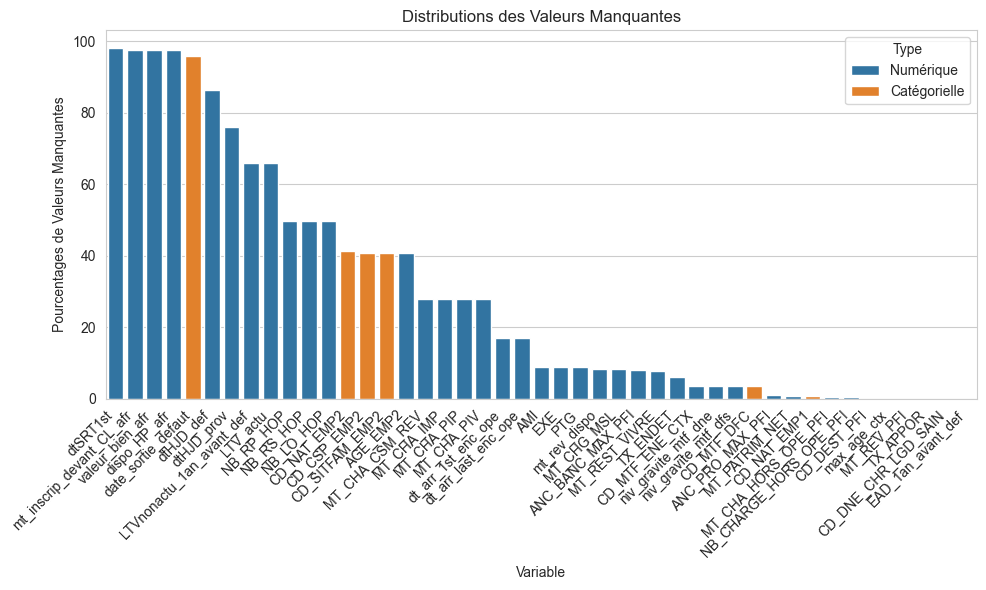

In [33]:
df_filtered = df_types[df_types["Pcentage_NaN"] > 0]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered, x="Variable", y="Pcentage_NaN", hue="Type", dodge=False)
plt.title("Distributions des Valeurs Manquantes")
plt.ylabel("Pourcentages de Valeurs Manquantes")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Type")
plt.tight_layout()
plt.show()

# Étude de la variable cible

### Équilibre de classe

In [34]:
df["fl_pass_DET"].value_counts()/df.shape[0]*100

fl_pass_DET
0    97.732052
1     2.267948
Name: count, dtype: float64

On a 2% de flag passage en DET contre 97% de 0. Ceci est lié au fait que le passage ou le non de passage s'observe en fin de gestion de l'opération. 

In [35]:
df_last_op = df.drop_duplicates('cd_op', keep='last')
df_last_op["fl_pass_DET"].value_counts()/df_last_op.shape[0]*100

fl_pass_DET
0    67.976829
1    32.023171
Name: count, dtype: float64

En ne gardant que les dernières observations pour chaque opération (là où on observe le passage en DET ou non), on tombe sur 2/3 de 0 contre 1/3 de 1

### Corrélation avec la variable cible

In [61]:
numericals = df.select_dtypes(exclude='object').columns

<Axes: >

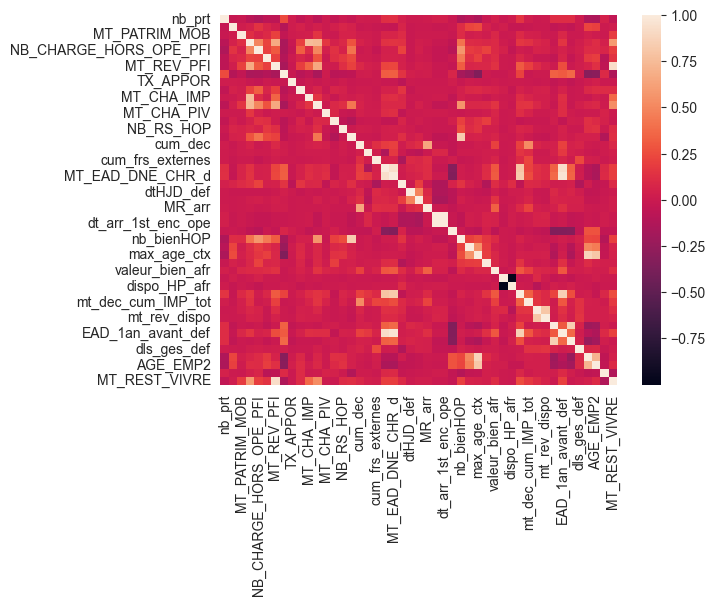

In [63]:
corr = df[numericals].corr()
sns.heatmap(corr)

# Feature Engineering
Dans cette section, nous allons étudier l'évolution du nombre de passage en DET en fonction des modalités de certaines variables catégorielles

In [67]:
df = df.drop_duplicates(subset = 'cd_op',keep = 'last')
df["arrete"] = pd.to_datetime(df["arrete"])
df.shape

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_7995/267640798.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["arrete"] = pd.to_datetime(df["arrete"])


(23305, 91)

In [126]:
def plot_regroupement(var1, var2) : 
    for col in df[[var1,var2]].columns:
    
        result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
       
        fig, ax = plt.subplots(figsize=(10, 6))
        
        for genre, group in result.groupby(f'{col}'):
            ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
        
        ax.legend()
        ax.set_xlabel('Date')
        ax.set_ylabel('Moyenne de passage en DET')
        ax.set_title(f'Évolution de la moyenne du passage en DET par {var1} dans le temps')
     
        plt.show()
    
    category_counts = df[var2].value_counts().reset_index()
    category_counts.columns = ['Catégorie', 'Fréquence']
    
    plt.figure(figsize=(10, 3))
    plt.bar(category_counts['Catégorie'], category_counts['Fréquence'], color='skyblue')  
    plt.title('Vérification des effectifs par nouvelles modalités')  
    plt.xlabel('Catégorie')  
    plt.ylabel('Fréquence') 
    plt.xticks(rotation=45, ha='right')
    plt.show() 

### CD_CSP_EMP1

In [118]:
list_mean = []
for cat in df['CD_CSP_EMP1'].unique():
    moyenne = df[df['CD_CSP_EMP1']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
CSP = pd.DataFrame(list_mean)
CSP['CSP'] = df['CD_CSP_EMP1'].unique()
CSP

0  CSP
0   0.292958  ISA
1   0.350590  PEO
2   0.308180  PCA
3   0.321584  FEO
4   0.317661  FCA
5   0.290909  LDS
6   0.349575  PAM
7   0.290441  LAC
8   0.251682  LPM
9   0.266541  LPL
10  0.262500  LAG
11  0.323457  PIN
12  0.315508  LZZ
13  0.142857  IET
14  0.272727  ICH
15  0.331439  IRE

In [127]:
precaire = ['PEO' , 'PAM', 'FEO', 'FCA']
df['CSP'] = np.where(df['CD_CSP_EMP1'].isin(precaire), 'Mauvaise CSP', 'Bonne CSP')

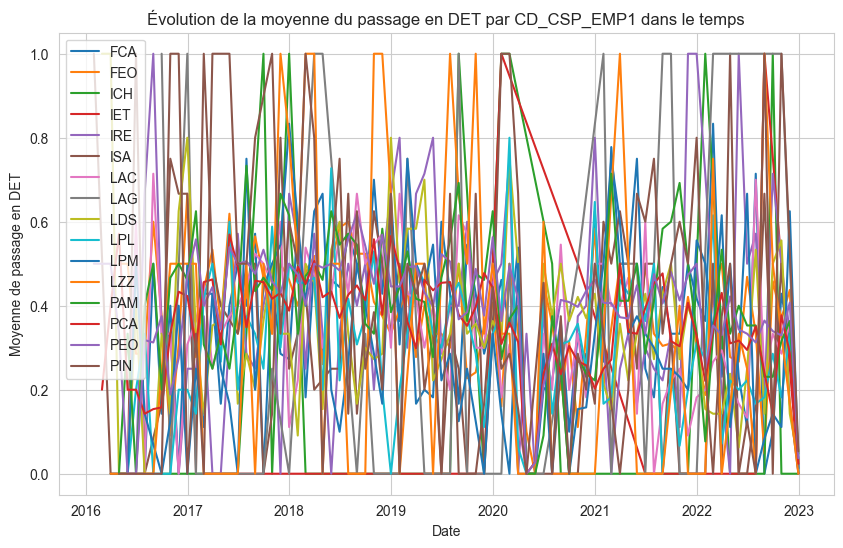

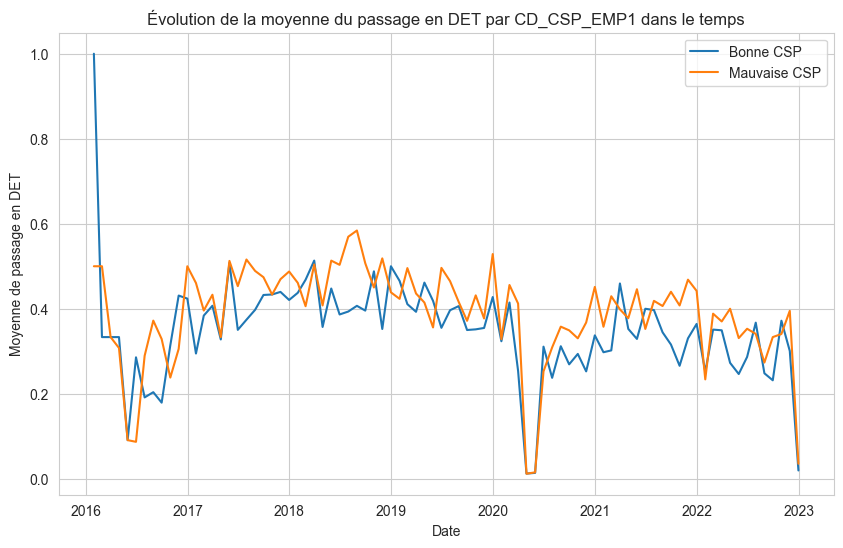

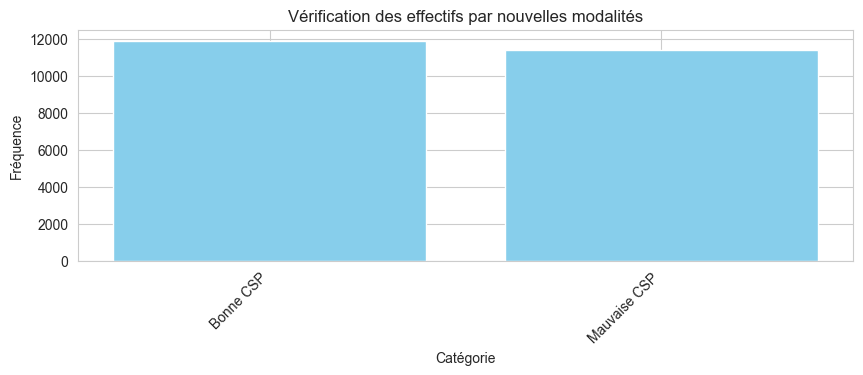

In [128]:
plot_regroupement('CD_CSP_EMP1', 'CSP')

### CD_MTF_DFC


In [120]:
list_mean = []
for cat in df['CD_MTF_DFC'].unique():
    moyenne = df[df['CD_MTF_DFC']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['CD_MTF_DFC'].unique()
motif

0 Motif defaut
0   0.423913          SEP
1   0.444867          SUR
2   0.295699          BDF
3   0.016466          YYY
4   0.488673          MOR
5   0.291375          AUT
6   0.574511          DEC
7   0.326227          DI1
8        NaN          NaN
9   0.440252          RIS
10  0.261905          PCL
11  0.333333          CON
12  0.463958          DIV
13  0.474860          CHO
14  0.391393          SAN
15  0.770642          REL
16  0.740741          ORG
17  0.160377          PCT
18  0.666667          PPE
19  0.538462          SIN
20  1.000000          ESC

In [121]:
motif_tres_mauvais = ['ESC' , 'REL', 'ORG', 'PPE', 'DEC', 'SIN']
motif_mauvais = ['MOR', 'CHO', 'DIV', 'SUR', 'RIS', 'SEP', 'SAN', 'CON', 'DI1' ]  
motif_moyen = ['BDF', 'AUT', 'PCL', 'PCT', 'YYY']

# Ajouter une colonne 'Catégorie' au DataFrame en fonction des catégories
df['Motif'] = np.select(
    [
        df['CD_MTF_DFC'].isin(motif_tres_mauvais),
        df['CD_MTF_DFC'].isin(motif_mauvais),
        df['CD_MTF_DFC'].isin(motif_moyen)
    ],
    ['Motif tres mauvais', 'Motif mauvais', 'Motif moyen'],
    default='Motif moyen')

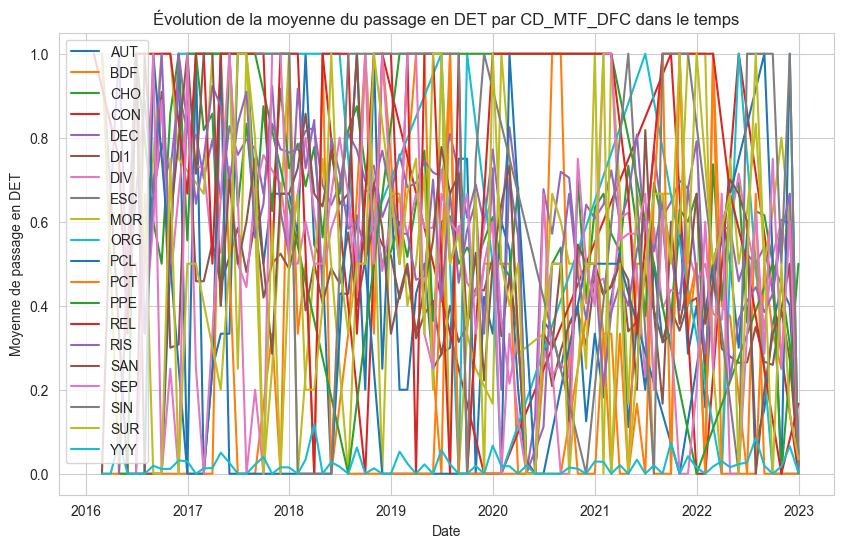

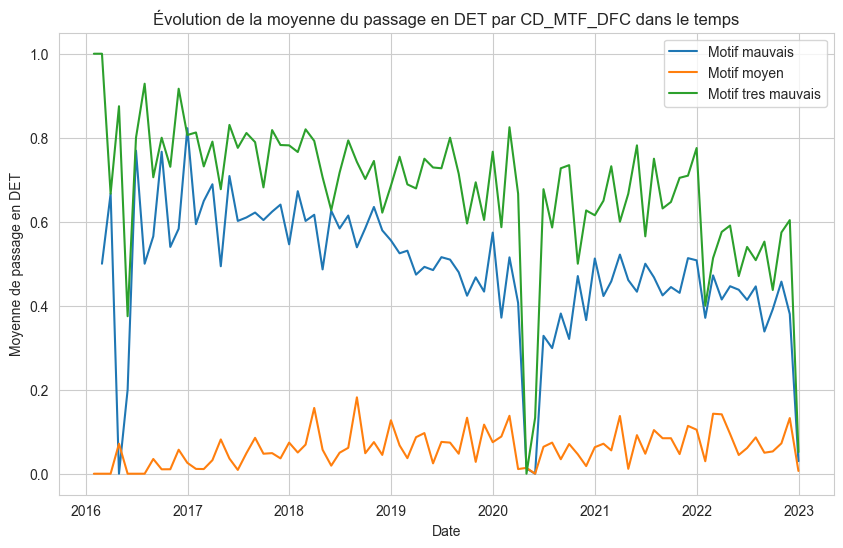

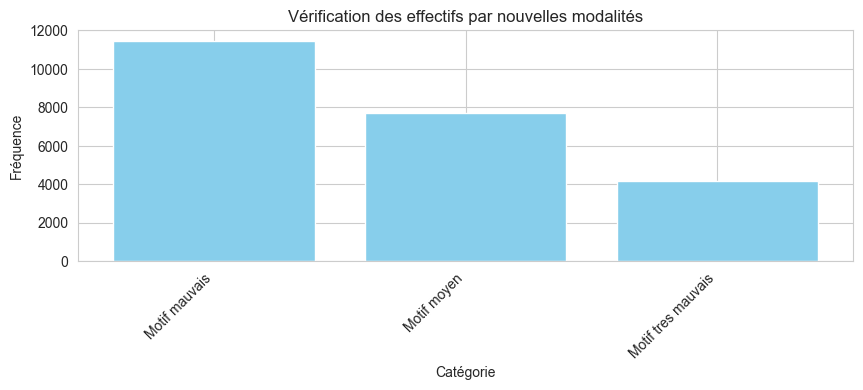

In [129]:
plot_regroupement('CD_MTF_DFC', 'Motif')

# CD_NATUR_OP_PFI

In [79]:
list_mean = []
for cat in df['CD_NATUR_OP_PFI'].unique():
    moyenne = df[df['CD_NATUR_OP_PFI']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['CD_NATUR_OP_PFI'].unique()
motif

0 Motif defaut
0   0.292713          TVX
1   0.339903          AQA
2   0.341605          AQN
3   0.280410          ACO
4   0.323504          ATV
5   0.269547          CON
6   0.255523          RAC
7   0.334320          SOU
8   0.284483          TRC
9   0.411215          ARA
10  0.279070          RSO
11  0.416667          ACR
12  0.375000          COR
13  0.166667          ARN
14  0.380952          ATR
15  0.216216          TSO
16  0.117647          ZZZ
17  0.384615          SCP

In [80]:
precaire = ['ACR', 'ARA', 'SCP', 'ATR', 'COR', 'AQN', 'AQA']
df['Nature'] = np.where(df['CD_NATUR_OP_PFI'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

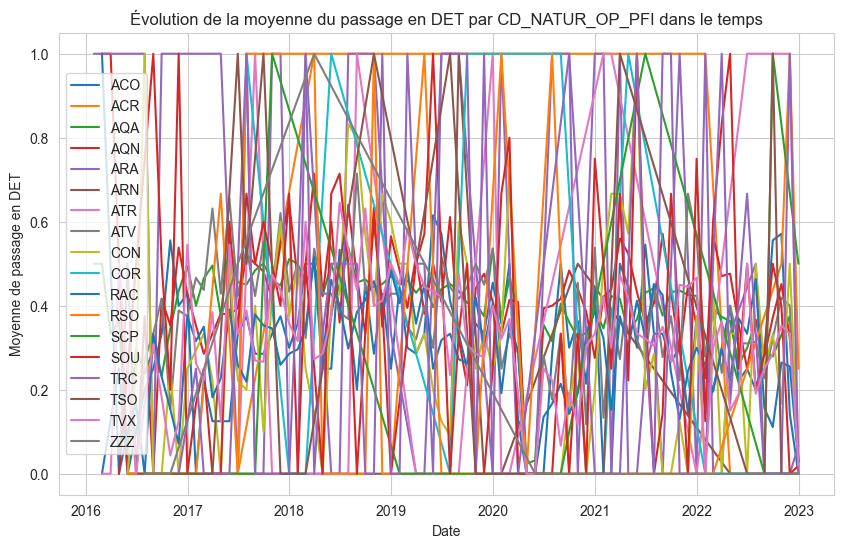

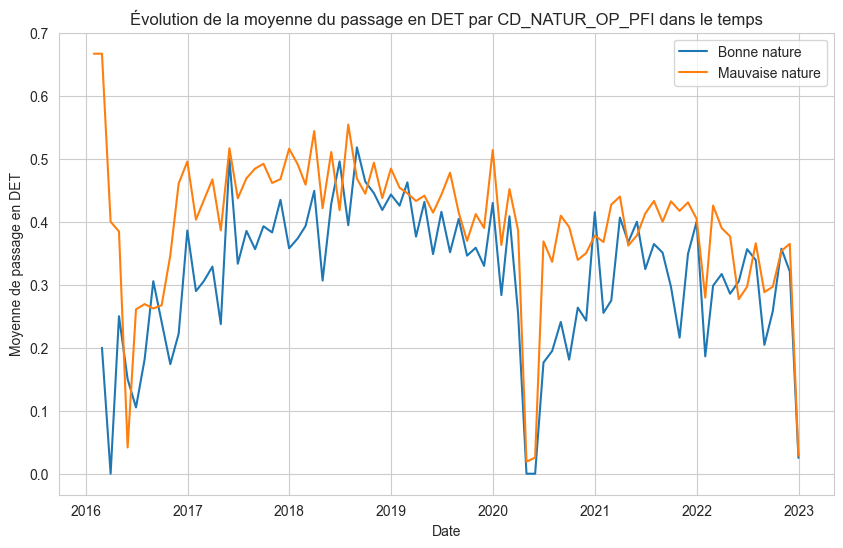

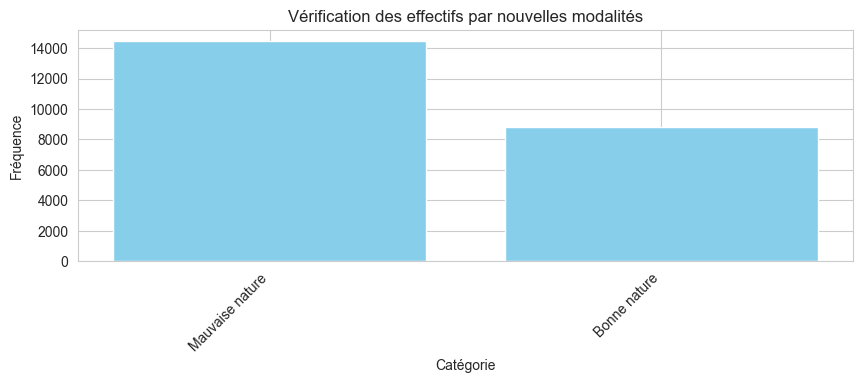

In [130]:
plot_regroupement('CD_NATUR_OP_PFI', 'Nature')

### CD_SITFAM_EMP1

In [83]:
list_mean = []
for cat in df['CD_SITFAM_EMP1'].unique():
    moyenne = df[df['CD_SITFAM_EMP1']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['CD_SITFAM_EMP1'].unique()
motif

0 Motif defaut
0  0.286272            U
1  0.298766            M
2  0.358103            C
3  0.286996            V
4  0.360096            D
5  0.298507            S
6  0.365517            I

In [84]:
precaire = ['I','D','C']
df['Situation_fam'] = np.where(df['CD_SITFAM_EMP1'].isin(precaire), 'Mauvaise situation', 'Bonne situation')

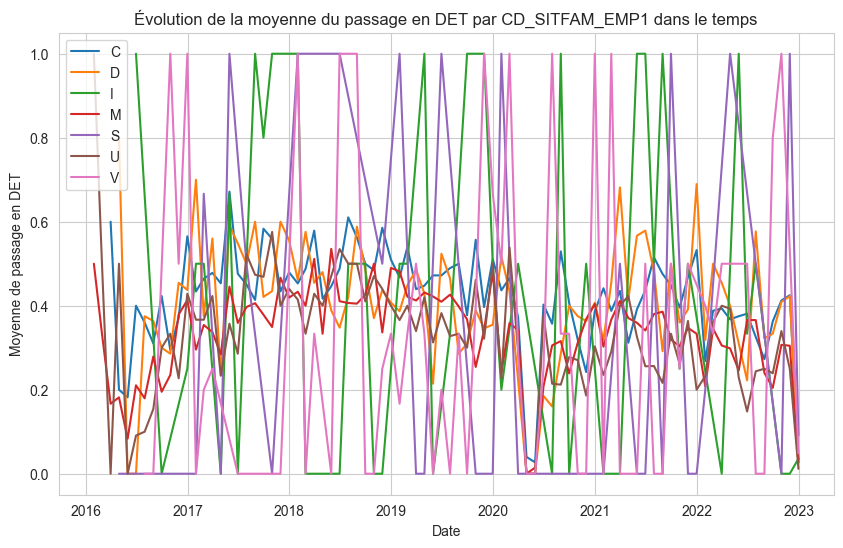

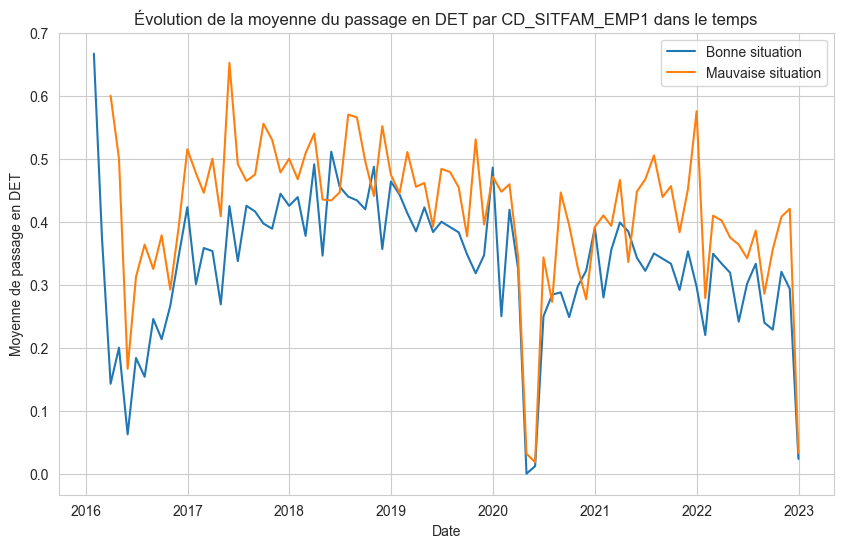

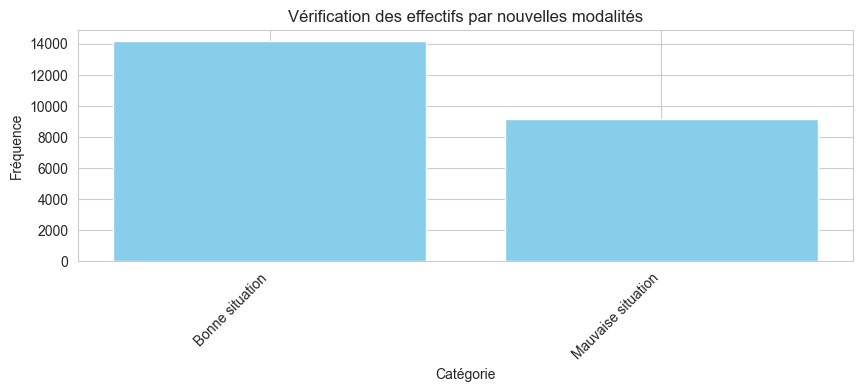

In [131]:
plot_regroupement('CD_SITFAM_EMP1', "Situation_fam")

### CD_DEST_PFI

In [87]:
list_mean = []
for cat in df['CD_DEST_PFI'].unique():
    moyenne = df[df['CD_DEST_PFI']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['CD_DEST_PFI'].unique()
motif

0 Motif defaut
0  0.500000           XX
1  0.330600           RP
2  0.303566           LO
3  0.282582           RS
4       NaN          NaN
5  0.263889           ZZ
6  0.230769           MI
7  0.500000           PR

In [88]:
precaire = ['XX', 'PR', 'RP']
df['Destination_bien'] = np.where(df['CD_DEST_PFI'].isin(precaire), 'Mauvaise destination', 'Bonne destination')

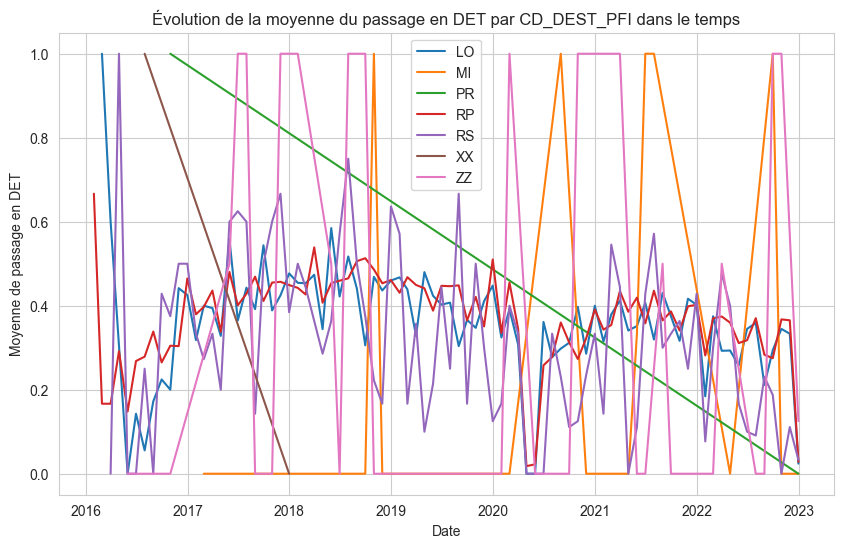

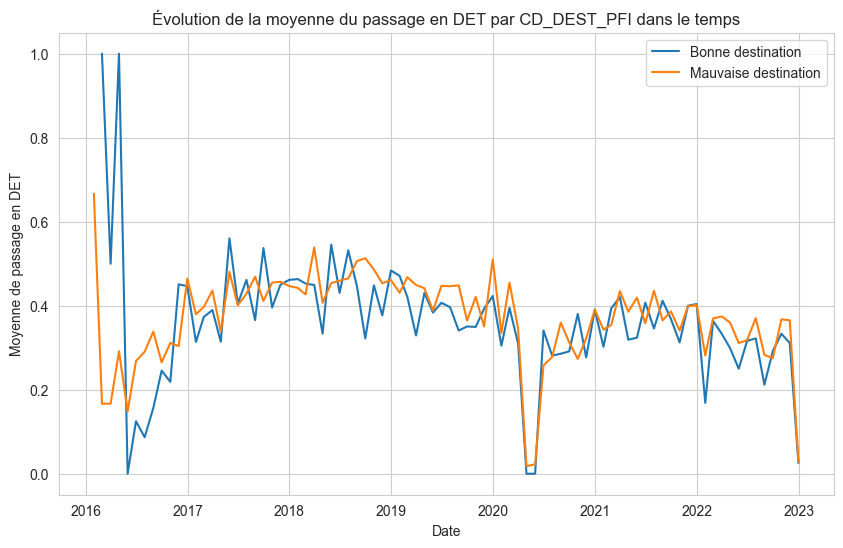

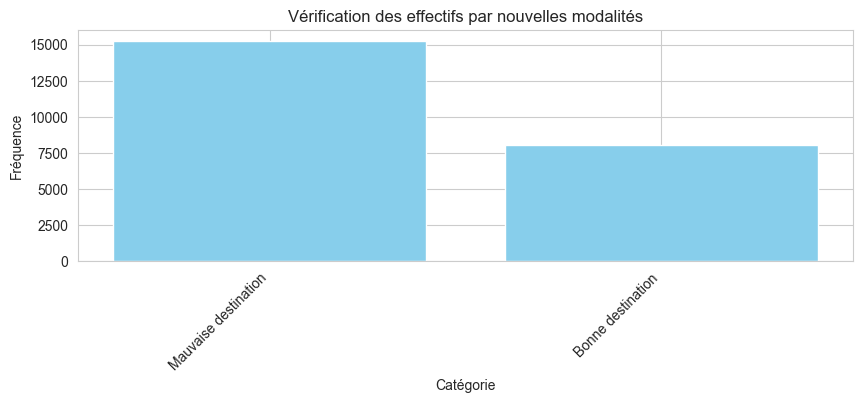

In [132]:
plot_regroupement('CD_DEST_PFI', 'Destination_bien')

### 'sol_echec'

In [91]:
list_mean = []
for cat in df['sol_echec'].unique():
    moyenne = df[df['sol_echec']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['sol_echec'].unique()
motif

0 Motif defaut
0  0.124637          0_0
1  0.736831          0_1
2  0.080253          1_0
3  0.371057          1_1

In [92]:
precaire = ['0_1', '1_1']
df['Solution_echec'] = np.where(df['sol_echec'].isin(precaire), 'Mauvaise solution', 'Bonne solution')

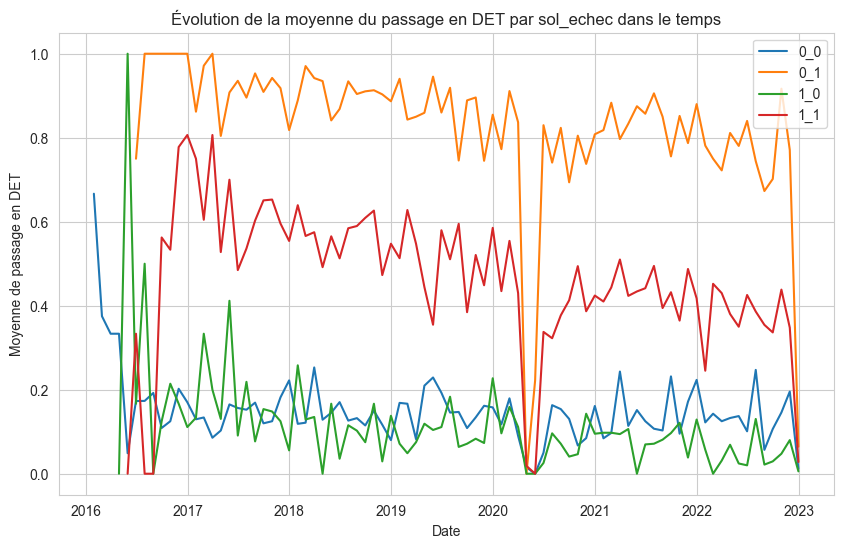

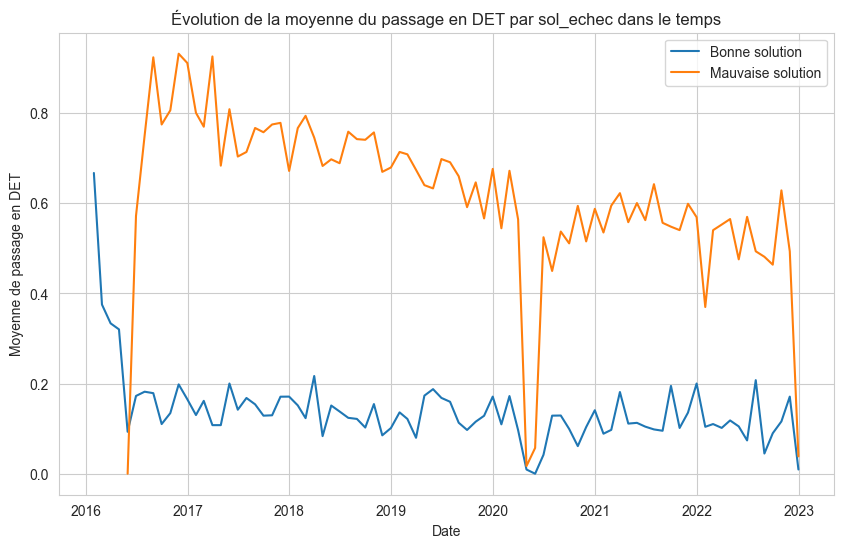

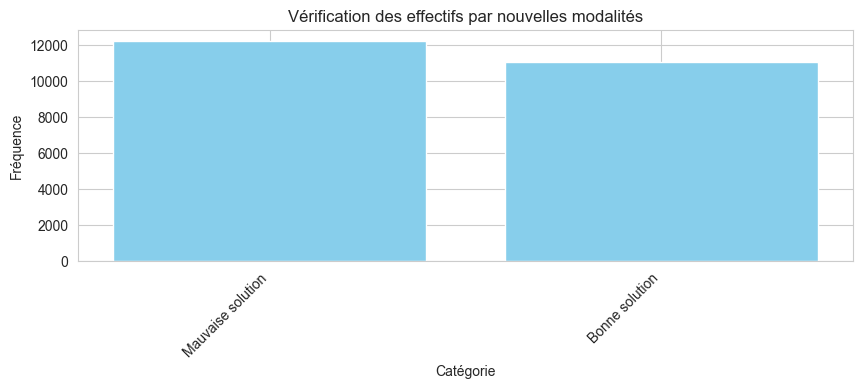

In [133]:
plot_regroupement('sol_echec', 'Solution_echec')

### regroup_natur_op

In [94]:
list_mean = []
for cat in df['regroup_natur_op'].unique():
    moyenne = df[df['regroup_natur_op']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['regroup_natur_op'].unique()
motif

0    Motif defaut
0  0.309621       3_travaux
1  0.340370         4_autre
2  0.278764  1_neuf_aco_acr
3  0.263620    2_rachat_sou

In [95]:
precaire = ['4_autre']
df['Nature_op'] = np.where(df['regroup_natur_op'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

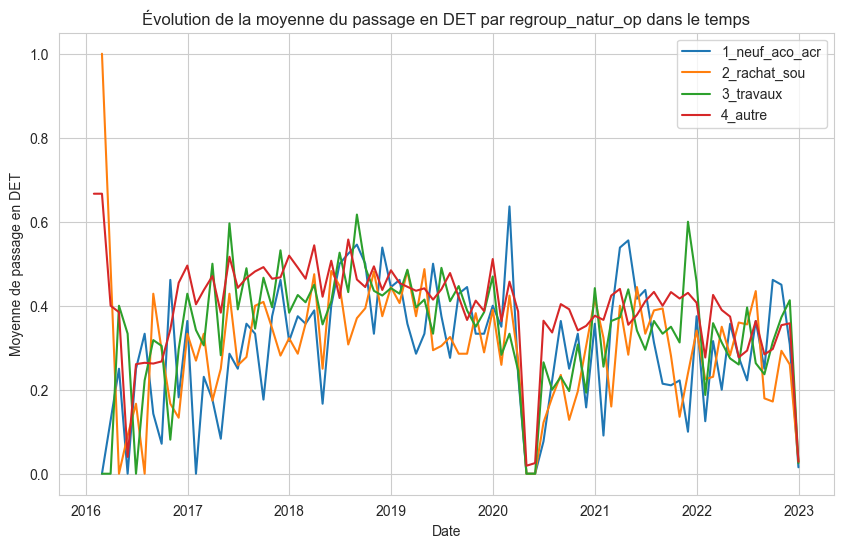

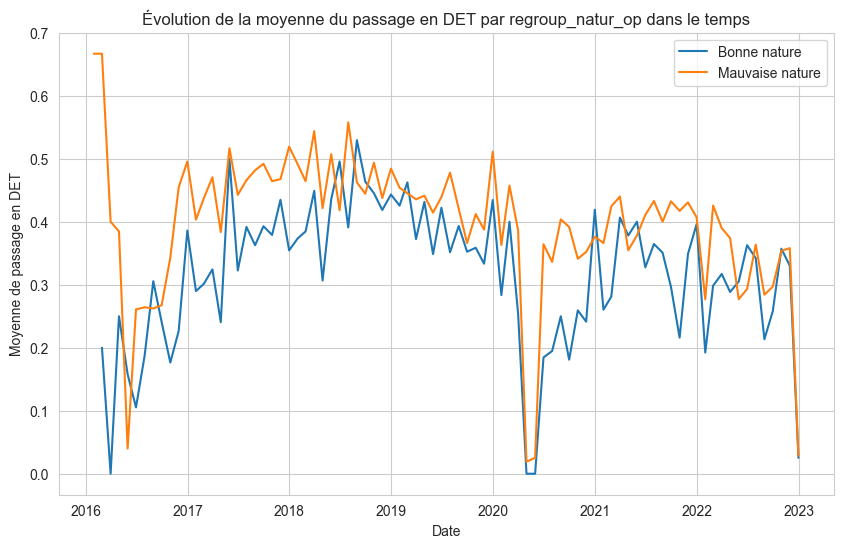

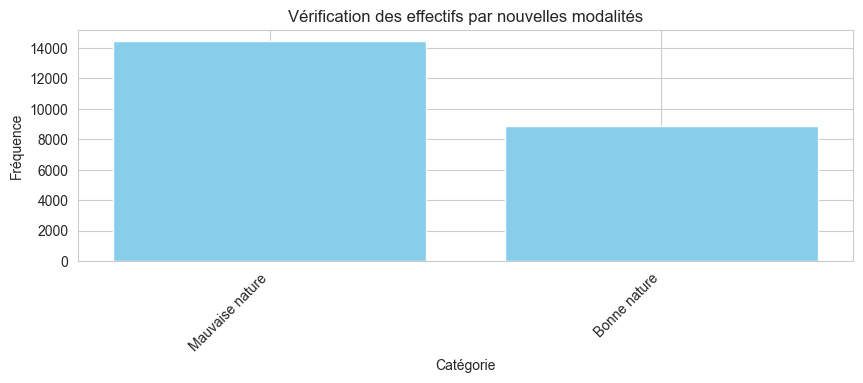

In [134]:
plot_regroupement('regroup_natur_op', 'Nature_op')

### CD_MTF_ENE_CTX

In [99]:
list_mean = []
for cat in df['CD_MTF_ENE_CTX'].unique():
    moyenne = df[df['CD_MTF_ENE_CTX']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['CD_MTF_ENE_CTX'].unique()
motif

0 Motif defaut
0   0.022222        108.0
1   0.372387        102.0
2        NaN          NaN
3   0.021164        105.0
4   0.000000        110.0
5   0.177570        106.0
6   0.000000        107.0
7   0.000000        500.0
8   0.000000        999.0
9   0.000000        505.0
10  0.090244        111.0
11  0.000000        504.0
12  0.000000        501.0
13  0.000000        100.0
14  0.000000        101.0
15  0.000000        112.0
16  0.000000        508.0
17  0.000000        502.0

In [136]:
precaire = [102.0]
df['MTF'] = np.where(df['CD_MTF_ENE_CTX'].isin(precaire), 'Mauvais MTF', 'Bon MTF')

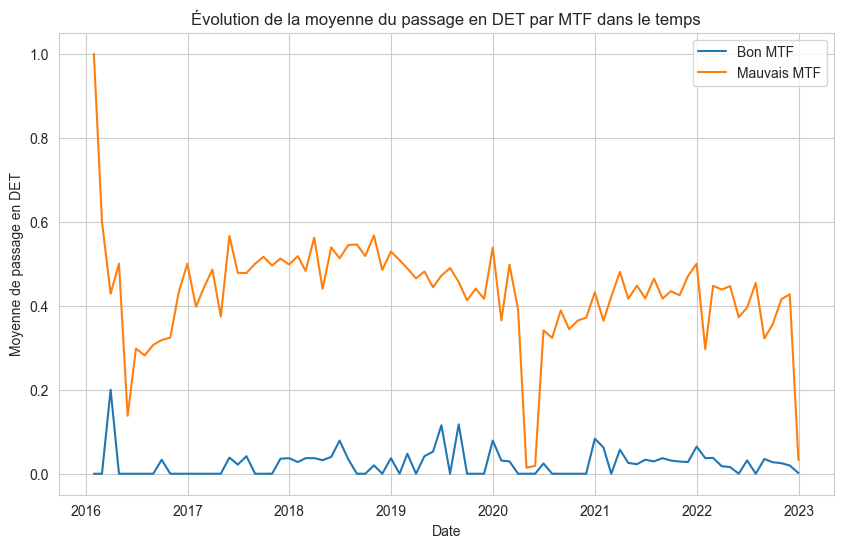

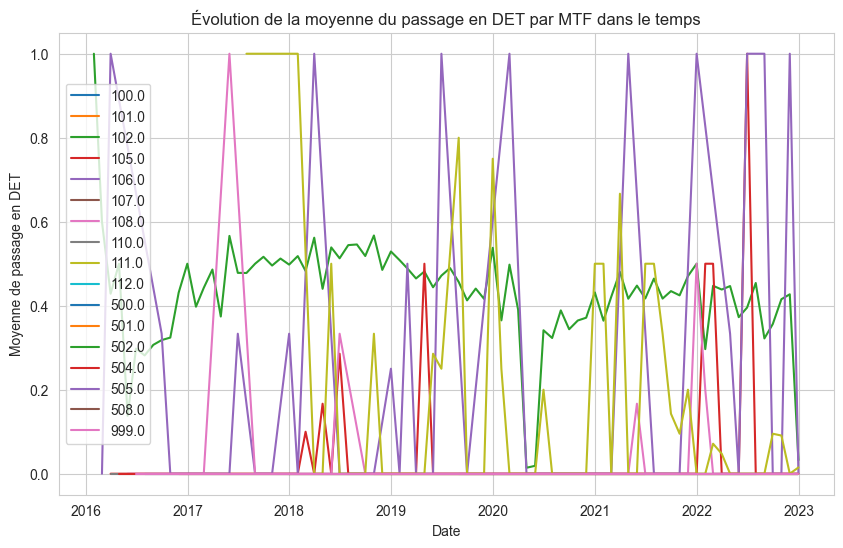

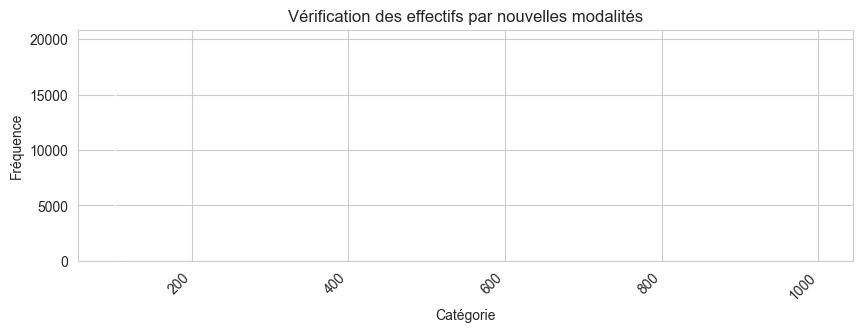

In [137]:
plot_regroupement('MTF', "CD_MTF_ENE_CTX")

### CD_ETAT_CIVIL

In [138]:
list_mean = []
for cat in df['CD_ETAT_CIVIL'].unique():
    moyenne = df[df['CD_ETAT_CIVIL']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['CD_ETAT_CIVIL'].unique()
motif

0 Motif defaut
0  0.291453            7
1  0.304017            6
2  0.383410            5
3  0.314206            3
4  0.252390            9
5  0.321267            2
6  0.222078            1
7  0.406910            4
8  0.312039            8

In [107]:
precaire = [4.0,5.0,2.0,8.0,3.0,7.0]
df['ETAT_CIVIL'] = np.where(df['CD_ETAT_CIVIL'].isin(precaire), 'Mauvais etat', 'Bon etat')

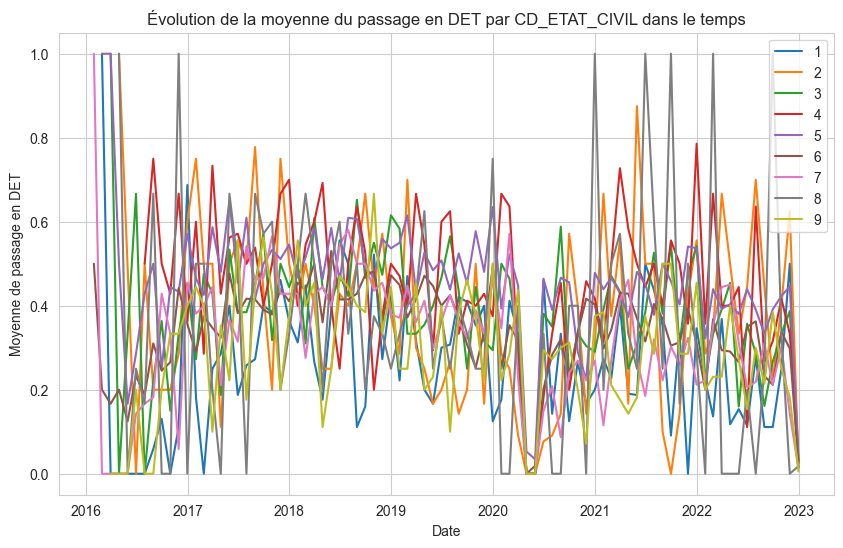

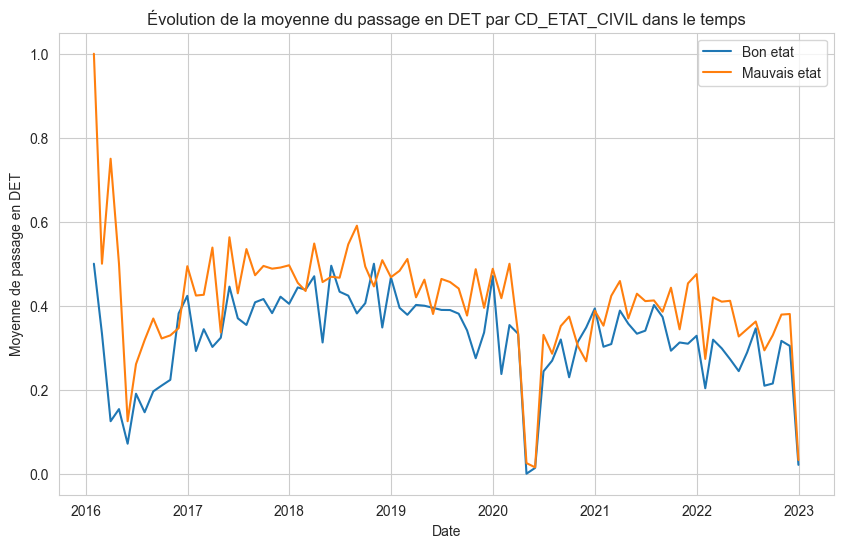

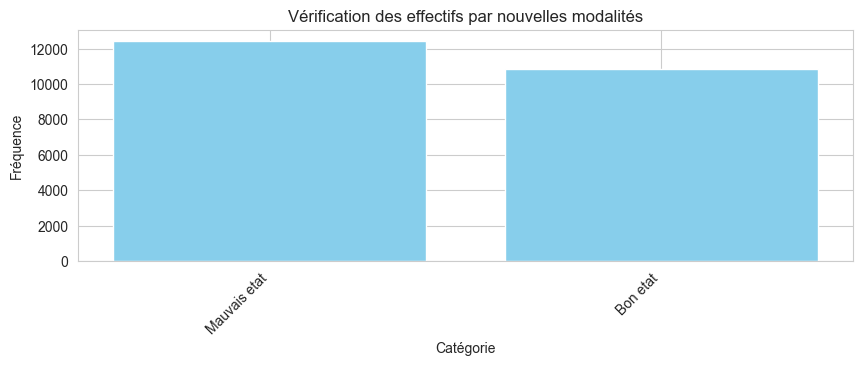

In [139]:
plot_regroupement('CD_ETAT_CIVIL', 'ETAT_CIVIL')